     Average Rt(min)  Average Mz  \
0              8.228    678.2912   
1              8.228    678.2912   
2              8.228    678.2912   
3              8.228    678.2912   
4              8.228    678.2912   
..               ...         ...   
210            8.228    678.2912   
211            8.228    678.2912   
212            8.228    678.2912   
213            8.228    678.2912   
214            8.228    678.2912   

                                           Sample Name       Area  
0    20210701_50220_V-10_Ro-65_R-1_Pos_Ironman_H2O-...   92483376  
1    20210701_50220_V-11_Ro-55_R-1_Pos_Ironman_H2O-...   95549320  
2    20210701_50220_V-12_Ro-61_R-1_Pos_Ironman_H2O-...   95409432  
3    20210701_50220_V-15_Ro-26_R-1_Pos_Ironman_H2O-...  104141208  
4    20210701_50220_V-16_Ro-45_R-1_Pos_Ironman_H2O-...   92620520  
..                                                 ...        ...  
210  20210707_50220_V-97_Ro-047_R-2_Pos_Ironman_H2O...   96854552  
211  20210707_50220_V-9

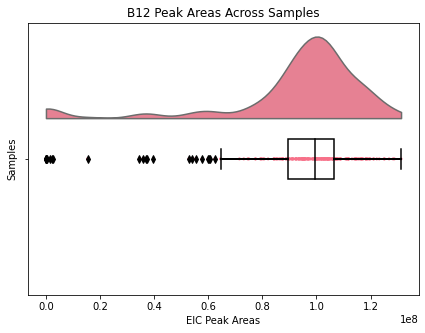

In [11]:
#import pandas module
import pandas as pd 
import numpy as np
import ptitprince as pt
import matplotlib.pyplot as plt 
import seaborn as sns

#creating a dataframe
metabolites = pd.read_csv("LLNL_alignment2021July.csv")
#filtering for our internal standard. Specify RT and m/z
b12 = metabolites[(metabolites["Average Rt(min)"] == 8.228 )& (metabolites["Average Mz"] == 678.2912)]
#Dropping unnecesary columns. This section varies depending on type of csv
b12 = b12.iloc[:, np.r_[1,2,32: 247]]
b12 = b12.melt(id_vars=['Average Rt(min)','Average Mz'], var_name=('Sample Name'),value_name=('Area'))
print(b12)
###Creating a raincloud (combination of half-violin, box, and strip plots)
f, ax = plt.subplots(figsize=(7, 5))
dx="Area"; ort="h"; pal = sns.color_palette("husl")
ax=pt.half_violinplot( x = dx, data = b12, palette = pal, bw = .2, cut = 0.,scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, data = b12, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, data = b12, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)                
plt.title("B12 Peak Areas Across Samples")
plt.xlabel("EIC Peak Areas")
plt.ylabel("Samples")
plt.savefig("B12_Distribution Across Samples.png")




In [16]:
# #Remove samples below the threshold using IQR
Q1 = b12['Area'].quantile(0.25)
Q3 = b12['Area'].quantile(0.75)
IQR = Q3-Q1

b12_out = (b12['Area'] >= Q1 - 1.5 * IQR) & (b12['Area'] <= Q3 + 1.5 *IQR)
b12_filter = b12.loc[b12_out]
b12_filter


,Average Rt(min),Average Mz,Sample Name,Area
0,8.228,678.2912,20210701_50220_V-10_Ro-65_R-1_Pos_Ironman_H2O-...,92483376
1,8.228,678.2912,20210701_50220_V-11_Ro-55_R-1_Pos_Ironman_H2O-...,95549320
2,8.228,678.2912,20210701_50220_V-12_Ro-61_R-1_Pos_Ironman_H2O-...,95409432
3,8.228,678.2912,20210701_50220_V-15_Ro-26_R-1_Pos_Ironman_H2O-...,104141208
4,8.228,678.2912,20210701_50220_V-16_Ro-45_R-1_Pos_Ironman_H2O-...,92620520
...,...,...,...,...
209,8.228,678.2912,20210707_50220_V-96_Ro-064_R-2_Pos_Ironman_H2O...,113135616
210,8.228,678.2912,20210707_50220_V-97_Ro-047_R-2_Pos_Ironman_H2O...,96854552
212,8.228,678.2912,20210707_50220_V-99_Ro-093_R-2_Pos_Ironman_H2O...,73139832
213,8.228,678.2912,20210707_50220_V-100_Ro-006_R-2_Pos_Ironman_H2...,95336312


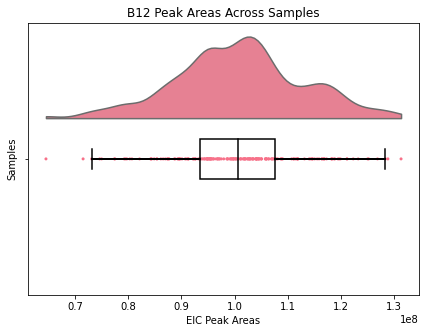

In [13]:
#Creating new raincloud with filtered data 
f, ax = plt.subplots(figsize=(7, 5))
dx="Area"; ort="h"; pal = sns.color_palette("husl")
ax=pt.half_violinplot( x = dx, data = b12_filter, palette = pal, bw = .2, cut = 0.,scale = "area", width = .6, inner = None, orient = ort)
ax=sns.boxplot( x = dx, data = b12_filter, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort) 
ax=sns.stripplot( x = dx, data = b12_filter, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = ort)               
plt.title("B12 Peak Areas Across Samples")
plt.xlabel("EIC Peak Areas")
plt.ylabel("Samples")
plt.savefig("Distribution Across Samples_QC.png")

In [50]:
from datetime import datetime
#Filtering alignment table using the list of quality checked samples. Output is a new datzframe for an alignment table containing only quality checked samples
#Only for MSdial formatted csv
head_met= metabolites.iloc[:,32:]
for col in head_met.columns:
    if col not in b12_filter['Sample Name'].unique(): 
        head_met.drop(columns=[col], inplace=True) 
#print(head_met)
metabolites = metabolites.iloc[:,0:4]
metabolites_filter = pd.concat([metabolites, head_met], axis=1)
#print(metabolites_filter)
#Save new filtered alignment table. Specifiy the required name
now_ = datetime.now().strftime('%b_ %d_ %y_ %H_%M_%S')
metabolites_filter.to_csv('Alignment_results_' + now_ + '.csv')

array([], dtype=bool)